In [75]:
using LinearAlgebra
using DelimitedFiles
using Plots

In [76]:
grid = readdlm("Travelling Wave Experiments/data/e5-9may11-black.txt");

pressureData = grid[1:end-2,1];
surfaceData = grid[1:end-2,2];

In [77]:
dt = 0.002;
num_points = size(pressureData,1);

time = collect(0:dt:(num_points-1)*dt);

In [78]:
plot(time,pressureData);
plot!(time,surfaceData);

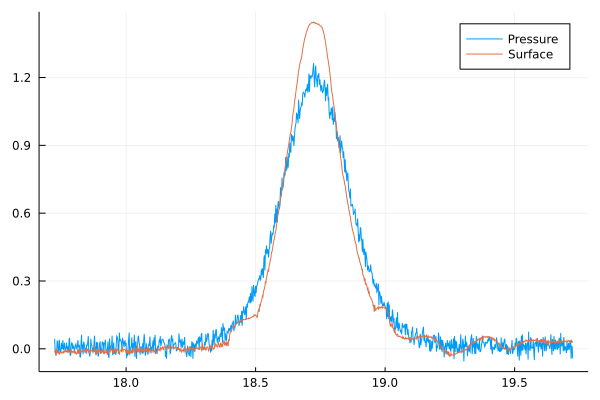

In [79]:
maxPressure = argmax(pressureData);
maxSurface = argmax(surfaceData);

pressureWindow = pressureData[maxPressure-500:maxPressure+500];
surfaceWindow = surfaceData[maxSurface-500:maxSurface+500]

window = [pressureWindow surfaceWindow];
timeWindow = time[maxPressure-500:maxPressure+500];

plot(timeWindow,window[:,1],label="Pressure")
plot!(timeWindow,window[:,2],label="Surface")

In [80]:
n = size(pressureWindow,1);

vec = hcat([1 -2 1],zeros(1,n-3));

mat = zeros(n-2,n); # 2 since we need t_{i-2} and t_{i-1} to approximate t_{i} (in addition to the point t_{i})

for i=1:n-2
    mat[i,:] = hcat(zeros(1,i-1),vec[1,1:end-i+1]');
end

mat = (1/dt)^2*mat;

In [88]:
g = 980;
h = 5.05;
rho = 1;
c = sqrt(g*h);

# pressureWindow = (maximum(surfaceData)/h)*pressureWindow .+ 1;

# eta = (1/g)*(pressureWindow[3:end] - (1/2)*(h/g)*mat*pressureWindow);

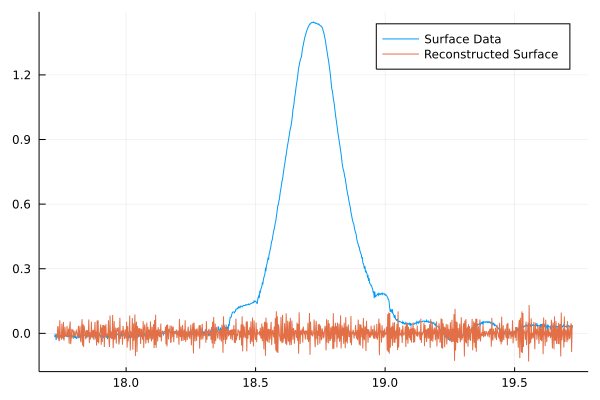

In [87]:
plot(timeWindow,window[:,2],label="Surface Data")
plot!(timeWindow[3:end],eta,label="Reconstructed Surface")